In [1]:
import pandas as pd
data=pd.read_csv("forestfires.csv")


In [2]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.shape

(517, 13)

In [4]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
import matplotlib.pyplot as plt

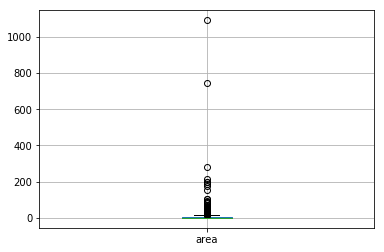

In [6]:
data.boxplot(column='area')

In [7]:
data[data['area']>100].area

232     103.39
233     105.66
234     154.88
235     196.48
236     200.94
237     212.88
238    1090.84
377     174.63
415     746.28
420     185.76
479     278.53
Name: area, dtype: float64

In [8]:
data.shape

(517, 13)

In [9]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

# LinearModel


In [12]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model as lm

In [13]:
x=data[['FFMC','DMC','DC']]
y=data['area']

In [14]:
x.head()

,FFMC,DMC,DC
0,86.2,26.2,94.3
1,90.6,35.4,669.1
2,90.6,43.7,686.9
3,91.7,33.3,77.5
4,89.3,51.3,102.2


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
x_train.shape

(361, 3)

In [18]:
x_test.shape

(156, 3)

In [19]:
y_train.shape

(361,)

In [20]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x,y)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predictions=model.predict(x_test)

In [22]:
accuracy=model.score(x_test,y_test)
accuracy

0.016824303631580606

In [23]:
import numpy as np

In [24]:
np.sqrt(mean_squared_error(y_test,predictions))

62.414892039672075

In [25]:
r2_score(y_test,predictions)

0.016824303631580606

In [26]:
x=data[['DC','temp',]]
y=data['area']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
model=lm.LinearRegression()
results=model.fit(x,y)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predictions=model.predict(x_test)

In [30]:
accuracy=model.score(x_test,y_test)
accuracy

0.01992738646701242

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

62.31631777476529

In [32]:
r2_score(y_test,predictions)

0.01992738646701242

In [33]:
x=data[['FFMC','wind','temp','RH']]
y=data['area']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
model=lm.LinearRegression()
fwtr=model.fit(x,y)

In [36]:
predictions=fwtr.predict(x_test)

In [37]:
accuracy=fwtr.score(x_test,y_test)
accuracy

0.02346274614001631

In [38]:
predictions=fwtr.predict(x_test)

In [39]:
np.sqrt(mean_squared_error(y_test,predictions))

62.20382119472685

In [40]:
r2_score(y_test,predictions)

0.02346274614001631

# OUTLIER DETECTION & NORMALISATION

In [41]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [42]:
a=data['FFMC'].mean()
a

90.6446808510636

In [43]:
l=data[data['FFMC']<80].count()
l


X        12
Y        12
month    12
day      12
FFMC     12
DMC      12
DC       12
ISI      12
temp     12
RH       12
wind     12
rain     12
area     12
dtype: int64

In [44]:
l=[63.5,79.5,69.0,68.2,63.5,53.4,50.4,18.7,75.1,75.1,79.5,79.5]
l


[63.5, 79.5, 69.0, 68.2, 63.5, 53.4, 50.4, 18.7, 75.1, 75.1, 79.5, 79.5]

In [45]:
data['FFMC'].replace([63.5,79.5,69.0,68.2,63.5,53.4,50.4,18.7,75.1,75.1,79.5,79.5],[90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6,90.6],inplace=True)

In [46]:
data[data['FFMC']<80].count()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [47]:
x=data['rain']
y=data['area']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
x_train=x_train.values.reshape((-1,1))

In [50]:
x_test=x_test.values.reshape((-1,1))

In [51]:
model=lm.LinearRegression()
results=model.fit(x_train,y_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
predictions=model.predict(x_train)

In [53]:
accuracy=model.score(x_train,y_train)
accuracy

0.00040748407949287024

In [54]:
np.sqrt(mean_squared_error(y_train,predictions))

59.90464263783848

In [55]:
r2_score(y_train,predictions)

0.00040748407949287024

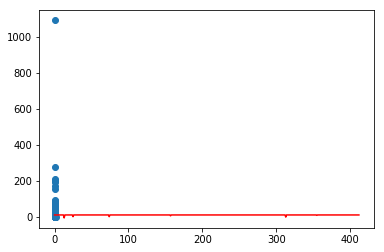

In [56]:
plt.scatter(x_train,y_train)
plt.plot(predictions,color="r")

In [57]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,91.247776,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.801816,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,81.500000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.400000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# CLASSIFICATION

In [58]:
x=data[['FFMC','RH','rain','DC','wind','rain','DMC']]
#y=data['area']

In [59]:
y=[]
for i in data['area']:
    if(i==0):
        y.append(0)
    else:
        y.append(1)
y=pd.DataFrame(y)

In [60]:
from sklearn import preprocessing

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [63]:
lr=LogisticRegression()

In [64]:
#y_train=y_train.astype('int')

In [65]:
lr.fit(x_train,y_train)

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
lr.score(x_test,y_test)

0.4807692307692308

In [72]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [73]:
from sklearn import preprocessing

In [74]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x=pd.DataFrame(minmax.fit(x).transform(x))
x.head()

,0,1,2,3,4,5,6
0,0.319728,0.423529,0.00000,0.101325,0.700000,0.00000,0.086492
1,0.619048,0.211765,0.00000,0.775419,0.055556,0.00000,0.118194
2,0.619048,0.211765,0.00000,0.796294,0.100000,0.00000,0.146795
3,0.693878,0.964706,0.03125,0.081623,0.400000,0.03125,0.110958
4,0.530612,0.988235,0.00000,0.110590,0.155556,0.00000,0.172984


In [75]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.transform(x_test)

In [76]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
lr_acc

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.5323741 , 0.57664234, 0.54744526])

In [77]:
lr_proba = cross_val_predict(lr,x_train_std,y_train,cv=3,method="predict_proba")
lr_scores=lr_proba[:,1]

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
y_pred=lr.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [80]:
y_test=y_test.astype('int')

In [480]:
accuracy_score(y_test,y_pred)

0.4807692307692308

In [81]:
confusion_matrix(y_test,y_pred)

array([[16, 32],
       [22, 34]], dtype=int64)

In [82]:
from sklearn.svm import SVC

In [83]:
sv=SVC(kernel='rbf',probability=True)
sv_classifier=sv.fit(x_train,y_train)
sv.score(x_test,y_test)

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5192307692307693

In [84]:
sv_acc=cross_val_score(sv_classifier,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
sv_acc

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.5323741 , 0.51824818, 0.50364964])

In [85]:
y_pred=sv.predict(x_test)

In [87]:
confusion_matrix(y_test,y_pred)

array([[11, 37],
       [13, 43]], dtype=int64)

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
dtc_clf_acc

array([0.53956835, 0.53284672, 0.50364964])

In [91]:
dtc_proba=cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')
dtc_scores=dtc_proba[:,1]

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
y_pred=dtc_clf.predict(x_test)

In [93]:
accuracy_score(y_test,y_pred)

0.5192307692307693

In [94]:
confusion_matrix(y_test,y_pred)

array([[28, 20],
       [30, 26]], dtype=int64)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
rmf_clf=rmf.fit(x_train,y_train)

C:\Users\Dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [98]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
rmf_clf_acc

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.53956835, 0.62043796, 0.54014599])

In [99]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')
rmf_scores = rmf_proba[:,1]

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
rmf_clf.score(x_test,y_test)

0.47115384615384615

In [101]:
y_pred=rmf_clf.predict(x_test)

In [102]:
accuracy_score(y_test,y_pred)

0.47115384615384615

In [103]:
confusion_matrix(y_test,y_pred)

array([[18, 30],
       [25, 31]], dtype=int64)

# Remove All Outliers in all features

In [104]:
data1=data

In [105]:
for i in data1['DMC']:
    if i>=250:
        data1['DMC'].replace(i,data1.DMC.mean(),inplace=True)

In [106]:
for i in data1['DMC']:
    if i<=60:
        data1['DMC'].replace(i,data1.DMC.mean(),inplace=True)

In [107]:
for i in data1['ISI']:
    if i>17:
        data1['ISI'].replace(i,data1.ISI.mean(),inplace=True)
        


In [108]:
for i in data1['RH']:
    if i>82:
        data1['RH'].replace(i,data1.RH.mean(),inplace=True)
       

In [109]:
for i in data1['wind']:
    if i>8:
        data1['wind'].replace(i,data1.wind.mean(),inplace=True)
       

In [110]:
data1.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,91.247776,125.754961,547.940039,8.508440,18.889168,43.182898,3.896397,0.021663,12.847292
std,2.313778,1.229900,2.801816,36.419332,248.066192,3.457606,5.806625,14.585387,1.616501,0.295959,63.655818
min,1.000000,2.000000,81.500000,60.600000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.400000,105.800000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,116.521942,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,137.000000,713.900000,10.100000,22.800000,52.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,248.400000,860.600000,17.000000,33.300000,82.000000,8.000000,6.400000,1090.840000


In [111]:
x=data1[['FFMC','DMC','DC','ISI','temp','RH','wind']]
y=data1['area']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [113]:
reg = lm.LinearRegression()

In [114]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
reg.score(X_test,y_test)

0.018242133390102833

# Regression and Classification

In [116]:
x=data1[['FFMC','DMC','DC','ISI','temp','RH','wind']]
y=[]
for i in data1['area']:
    if(i==0):
        y.append(0)
    else:
        y.append(1)
y=pd.DataFrame(y)

In [117]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=1)

In [118]:
sv=SVC(kernel='rbf',probability=True)
sv_classifier=sv.fit(x_train1,y_train1)
sv.score(x_test1,y_test1)

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5256410256410257

In [119]:
y_pred=sv.predict(x_test1)

In [120]:
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        y_pred1.append(0)
    else:
        y_pred1.append(fwtr.predict(pd.DataFrame(data1.iloc[i,[4,8,9,10]]).transpose())[0])

In [121]:
y_pred1=pd.DataFrame(y_pred1)

In [122]:
np.sqrt(mean_squared_error(y_test,y_pred1))

75.17362493312424

In [123]:
r2_score(y_test,y_pred1)

-0.426217210059608

# Random Forest Regressor

In [133]:
x=data.iloc[:,[4,5,6,7,8,9,10]]
y=data.iloc[:,-1]

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [136]:
random = RandomForestRegressor()

In [137]:
random.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [138]:
y_pred=random.predict(x_train)

In [139]:
r2_score(y_train,y_pred)

0.7936433401569418

In [140]:
np.sqrt(mean_squared_error(y_train,y_pred))

29.341827621768488

In [141]:
random.score(x_train,y_train)

0.7936433401569418